In [26]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

# Load Dataset
df = pd.read_csv("Hotel_Reviews.csv")
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (515738, 17)


,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [27]:
#  Basic Info and Missing Values
df.info()
print("\nMissing Values:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

In [30]:
# Descriptive Statistics
df.describe()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
count,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,515738.000000,512470.000000,512470.000000
mean,498.081836,8.397487,18.539450,2743.743944,17.776458,7.166001,8.395077,49.442439,2.823803
std,500.538467,0.548048,29.690831,2317.464868,21.804185,11.040228,1.637856,3.466325,4.579425
min,1.000000,5.200000,0.000000,43.000000,0.000000,1.000000,2.500000,41.328376,-0.369758
25%,169.000000,8.100000,2.000000,1161.000000,5.000000,1.000000,7.500000,48.214662,-0.143372
50%,341.000000,8.400000,9.000000,2134.000000,11.000000,3.000000,8.800000,51.499981,0.010607
75%,660.000000,8.800000,23.000000,3613.000000,22.000000,8.000000,9.600000,51.516288,4.834443
max,2682.000000,9.800000,408.000000,16670.000000,395.000000,355.000000,10.000000,52.400181,16.429233


Number of Unique Hotels: 1492


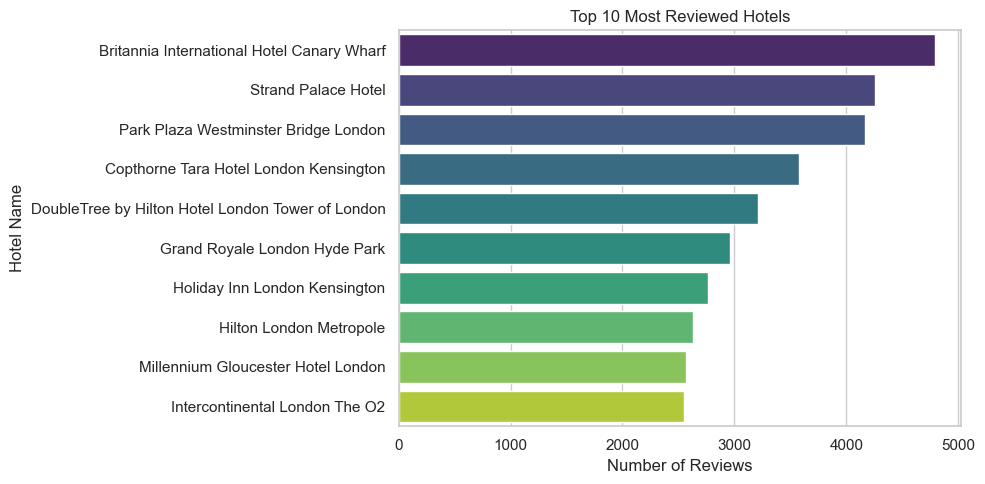

In [32]:
print("Number of Unique Hotels:", df['Hotel_Name'].nunique())
top_hotels = df['Hotel_Name'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_hotels.values, y=top_hotels.index, hue=None, palette="viridis", legend=False)
plt.title("Top 10 Most Reviewed Hotels")
plt.xlabel("Number of Reviews")
plt.ylabel("Hotel Name")
plt.tight_layout()
plt.show()

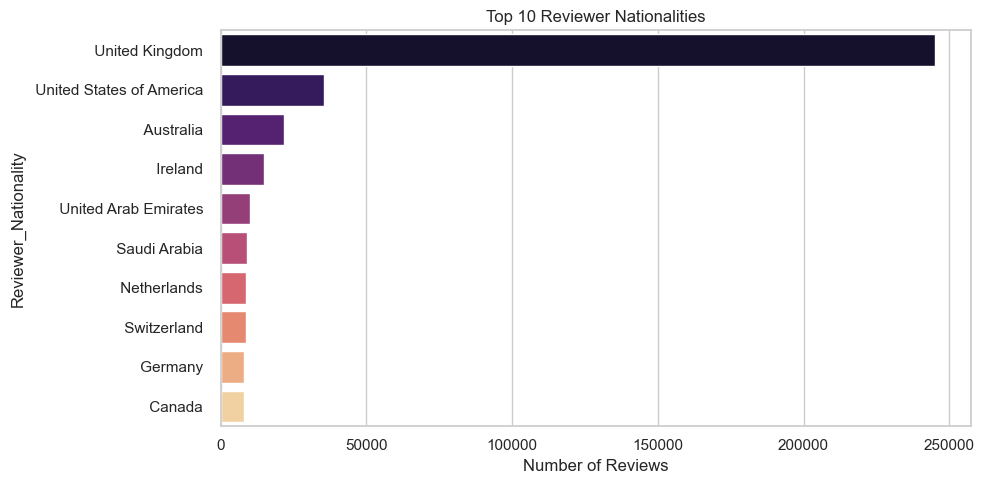

In [34]:
if 'Reviewer_Nationality' in df.columns:
    top_nations = df['Reviewer_Nationality'].value_counts().head(10)
    
    plt.figure(figsize=(10,5))
    sns.barplot(x=top_nations.values, y=top_nations.index, hue=None, palette='magma', legend=False)
    plt.title("Top 10 Reviewer Nationalities")
    plt.xlabel("Number of Reviews")
    plt.tight_layout()
    plt.show()

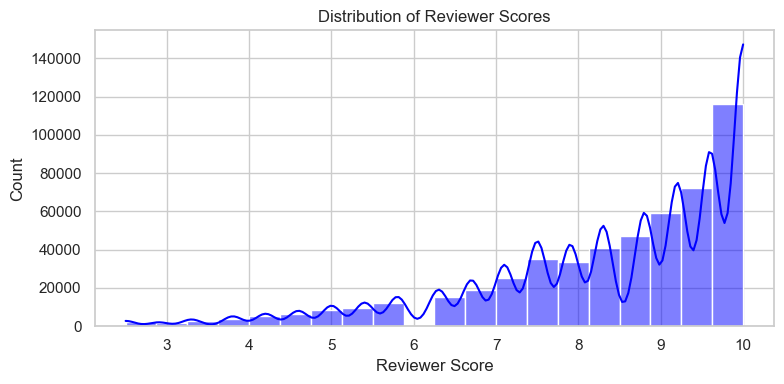

In [38]:
plt.figure(figsize=(8,4))
sns.histplot(df['Reviewer_Score'], bins=20, kde=True, color='Blue')
plt.title("Distribution of Reviewer Scores")
plt.xlabel("Reviewer Score")
plt.tight_layout()
plt.show()

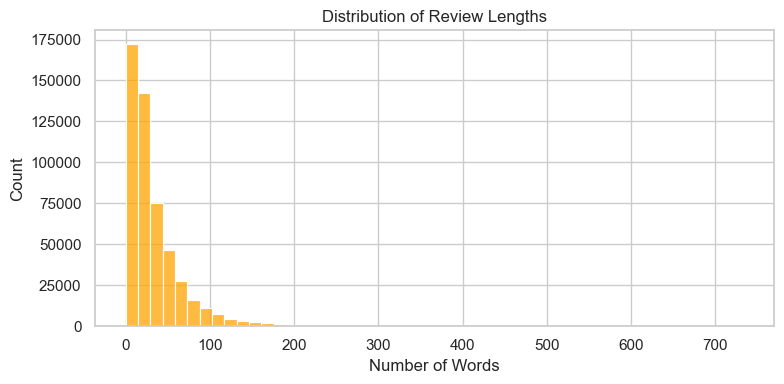

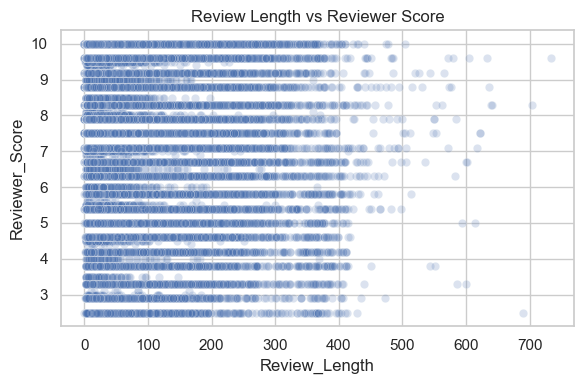

In [40]:
df['Full_Review'] = df['Positive_Review'].astype(str) + " " + df['Negative_Review'].astype(str)
df['Review_Length'] = df['Full_Review'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8,4))
sns.histplot(df['Review_Length'], bins=50, color='orange')
plt.title("Distribution of Review Lengths")
plt.xlabel("Number of Words")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x='Review_Length', y='Reviewer_Score', data=df, alpha=0.2)
plt.title("Review Length vs Reviewer Score")
plt.tight_layout()
plt.show()

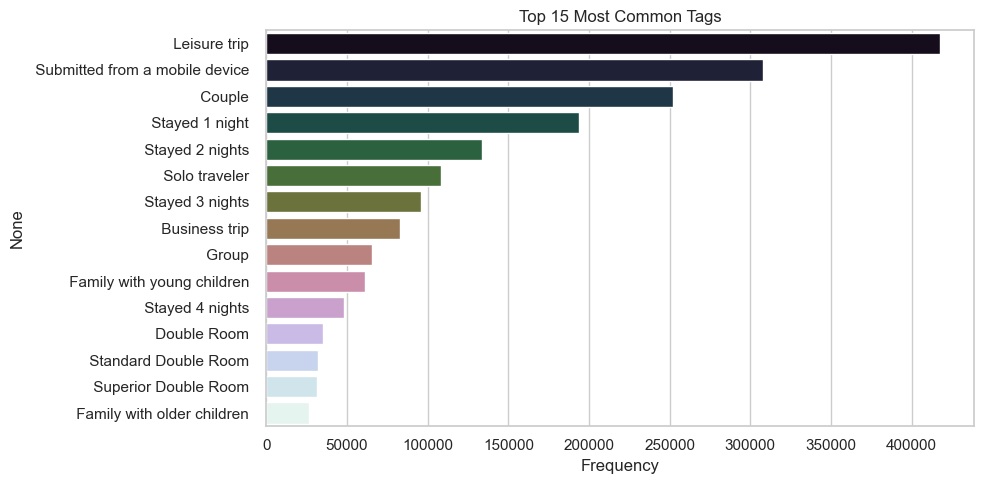

In [46]:
df['Tags'] = df['Tags'].astype(str)
all_tags = []

for row in df['Tags']:
    tags = re.findall(r"'(.*?)'", row)
    all_tags.extend(tags)

tag_counts = pd.Series(all_tags).value_counts().head(15)

plt.figure(figsize=(10,5))
sns.barplot(x=tag_counts.values, y=tag_counts.index, hue=None, palette='cubehelix', legend=False)
plt.title("Top 15 Most Common Tags")
plt.xlabel("Frequency")
plt.tight_layout()
plt.show()

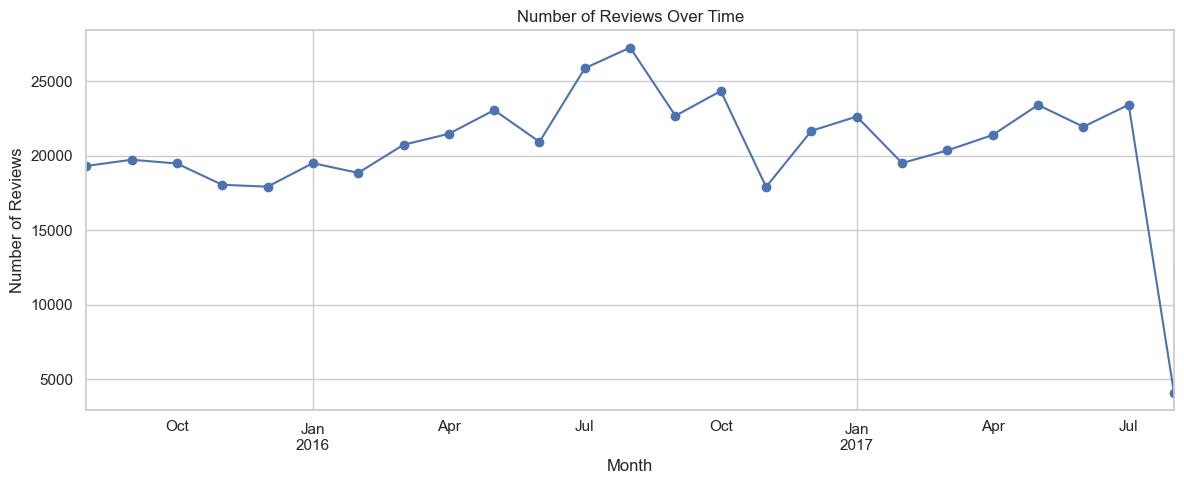

In [48]:
# Convert review date if exists
if 'Review_Date' in df.columns:
    df['Review_Date'] = pd.to_datetime(df['Review_Date'])

    # Review count by month
    df['Review_Month'] = df['Review_Date'].dt.to_period('M')
    monthly_counts = df['Review_Month'].value_counts().sort_index()

    plt.figure(figsize=(12,5))
    monthly_counts.plot(kind='line', marker='o')
    plt.title("Number of Reviews Over Time")
    plt.xlabel("Month")
    plt.ylabel("Number of Reviews")
    plt.tight_layout()
    plt.show()

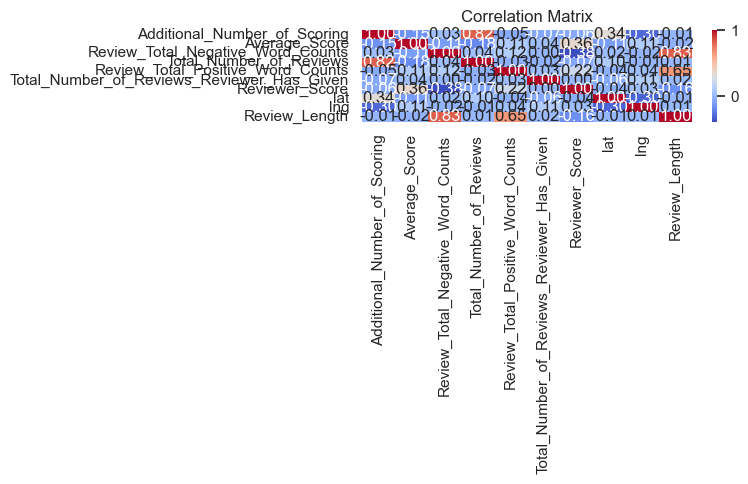

In [50]:
plt.figure(figsize=(8,5))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()